# Multicell example

This example shows how to run a model set up with the AllenSDK that contains multiple neurons with synaptic connections between them.

This notebook walks through running an already constructed model. Please see other files (`config.json`, `utils.py`, etc.) for details on how the model is implemented.

First we will import the libraries we need along with the SDK.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import visual as vis

from allensdk.model.biophys_sim.config import Config
from utils import Utils

Next, we'll load in our base configuration file that tells us how to generate the neurons in the circuit.

In [2]:
config = Config().load('config.json')   # read configuration for the model

utils = Utils(config)   # instantiate an object of a class Utils which configures NEURONand provides the interface to the necessary functions to set up the simuation
h = utils.h

We next call `utils.load_cell_db()` to get our cell database (telling us which neurons are of which type) and then pass that to `utils.generate_cells()` to actually instantiate the neurons in the simulation environment.

In [3]:
db = utils.load_cell_db()
cells = utils.generate_cells(db)	# read cell information from csv file

gid: 0   nr5a1
gid: 1   nr5a1
gid: 2   nr5a1
gid: 3   nr5a1
gid: 4   nr5a1
gid: 5   nr5a1
gid: 6   nr5a1
gid: 7   nr5a1
gid: 8   pvalb
gid: 9   pvalb


At this point, we can stimulate the cells with various current clamps at the soma to see how they respond while still unconnected.

In [4]:
utils.set_run_params()  # set h.dt and h.tsop
stims = utils.setIClamps(cells)
rec_vecs = utils.record_values(cells)

print "Running the model for %.1f (ms) with time step of %.3f (ms):" % (h.tstop, h.dt)
h.finitialize()
h.run()

{u'delay': 200.0, u'amps': {u'1': 0.045, u'0': -0.04, u'3': 0.055, u'2': 0.05, u'5': 0.065, u'4': 0.06, u'7': 0.075, u'6': 0.07, u'9': 0.18, u'8': 0.17}, u'dur': 1500.0}
Running the model for 2500.0 (ms) with time step of 0.025 (ms):


0.0

We use a couple of convenience routines to plot the membrane voltage from the different cells (excitatory in red, inhibitory in blue). 

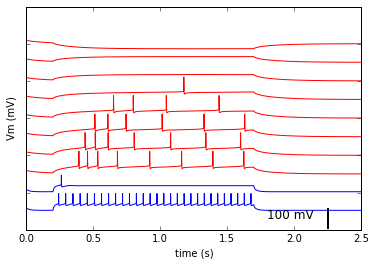

In [5]:
vis.Vm_traces(rec_vecs,db)
plt.show()

The cells respond with different numbers of spikes because they are stimulated with different current strengths.

Now, we will connect the cells to see how the activity pattern changes. We just need to load in our connectivity matrix that tells us which cells are connected with which partners.

In [6]:
con = utils.load_connectivity()
[netcons,syns]= utils.connect_cell(cells,db,con)
print '# of netcons, syns: ',len(netcons), len(syns)

tar_gid: 0  src_gids: [1] nsyn: [3]
nr5a1
tar_gid: 1  src_gids: [1 5 6] nsyn: [4 2 4]
nr5a1
tar_gid: 2  src_gids: [2 9] nsyn: [5 3]
nr5a1
tar_gid: 3  src_gids: [1 3 7 9] nsyn: [2 3 2 5]
nr5a1
tar_gid: 4  src_gids: [6 7 9] nsyn: [5 4 3]
nr5a1
tar_gid: 5  src_gids: [4 6 8] nsyn: [5 3 5]
nr5a1
tar_gid: 6  src_gids: [0 3 4 7 8] nsyn: [3 3 4 2 3]
nr5a1
tar_gid: 7  src_gids: [1] nsyn: [5]
nr5a1
tar_gid: 8  src_gids: [1 3 4 5 8] nsyn: [4 4 5 3 4]
pvalb
tar_gid: 9  src_gids: [1 3 9] nsyn: [2 3 4]
pvalb
# of netcons, syns:  107 107


Since our current clamp stimuli are already set up, we can just run the model again and plot the results.

Running the model for 2500.0 (ms) with time step of 0.025 (ms):


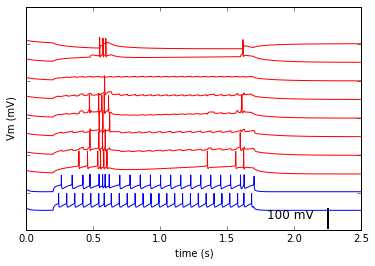

In [7]:
print "Running the model for %.1f (ms) with time step of %.3f (ms):" % (h.tstop, h.dt)
h.finitialize()
h.run()

vis.Vm_traces(rec_vecs,db)
plt.show()

You can see that the pattern of spikes have changed - some cells that did not fire before are now active, and the activity in the excitatory cells occurs more simultaneously. You can also see some subthreshold potentials due to synaptic input in the voltage traces.